# LoanDefaultPrediction

In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


In [1]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,average_precision_score, confusion_matrix, classification_report



## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Data Analysis

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [8]:
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
train_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [11]:
train_df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

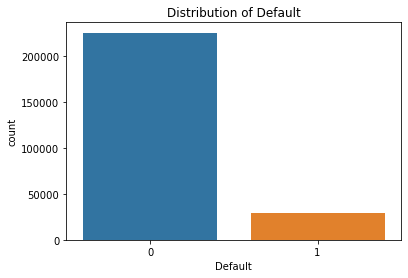

In [12]:
sns.countplot(x='Default', data=train_df)
plt.title('Distribution of Default')
plt.show()

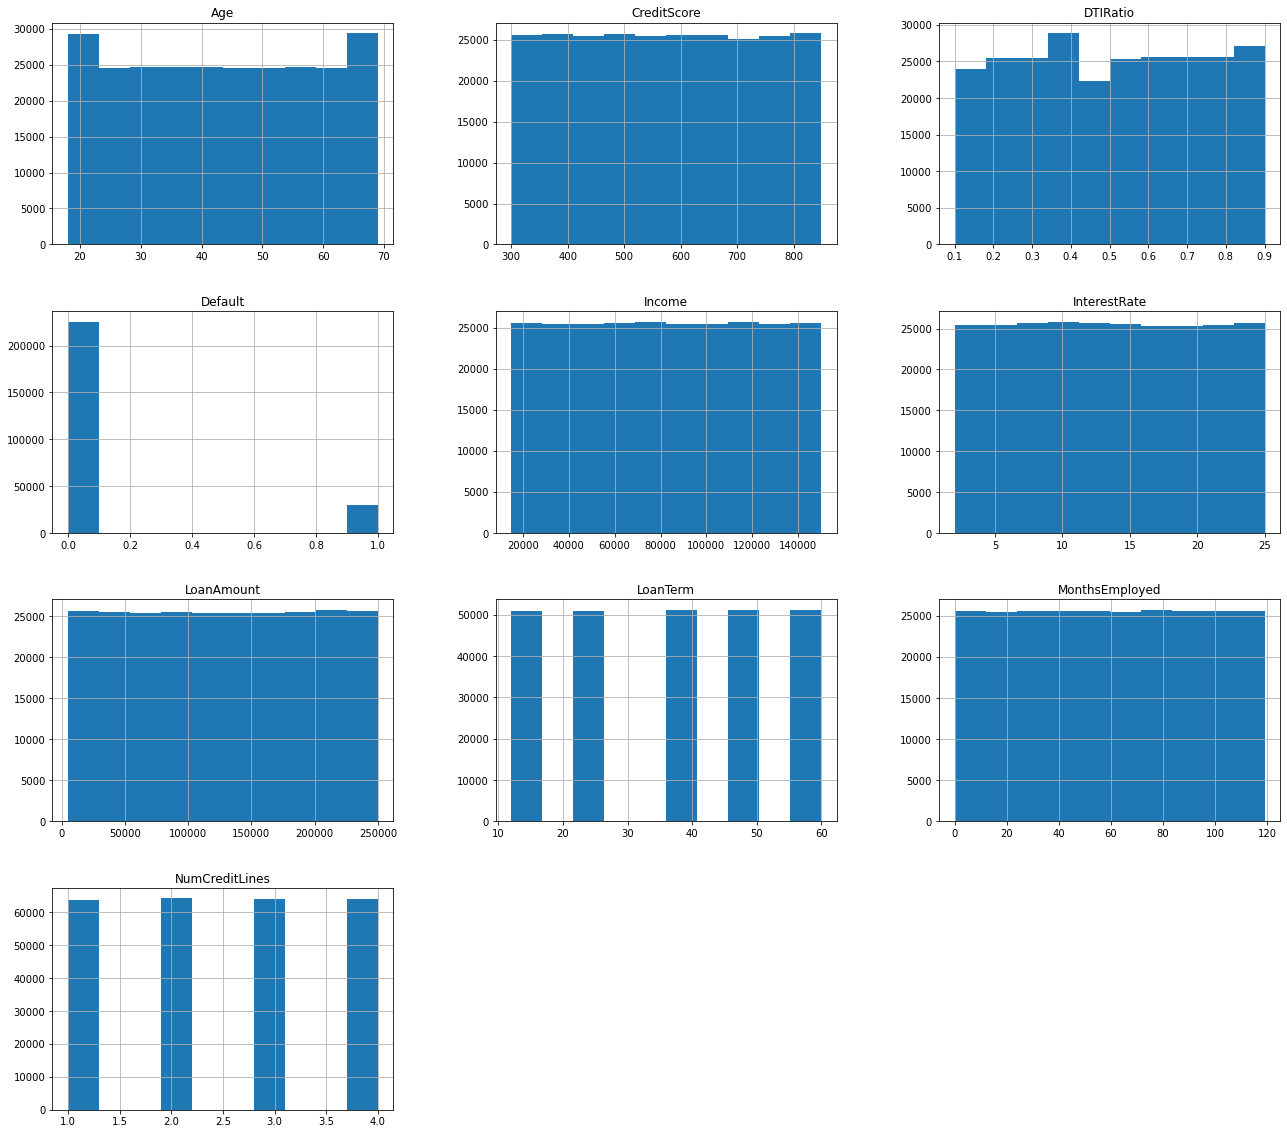

In [13]:
train_df.hist(figsize = (22,20))
plt.show()

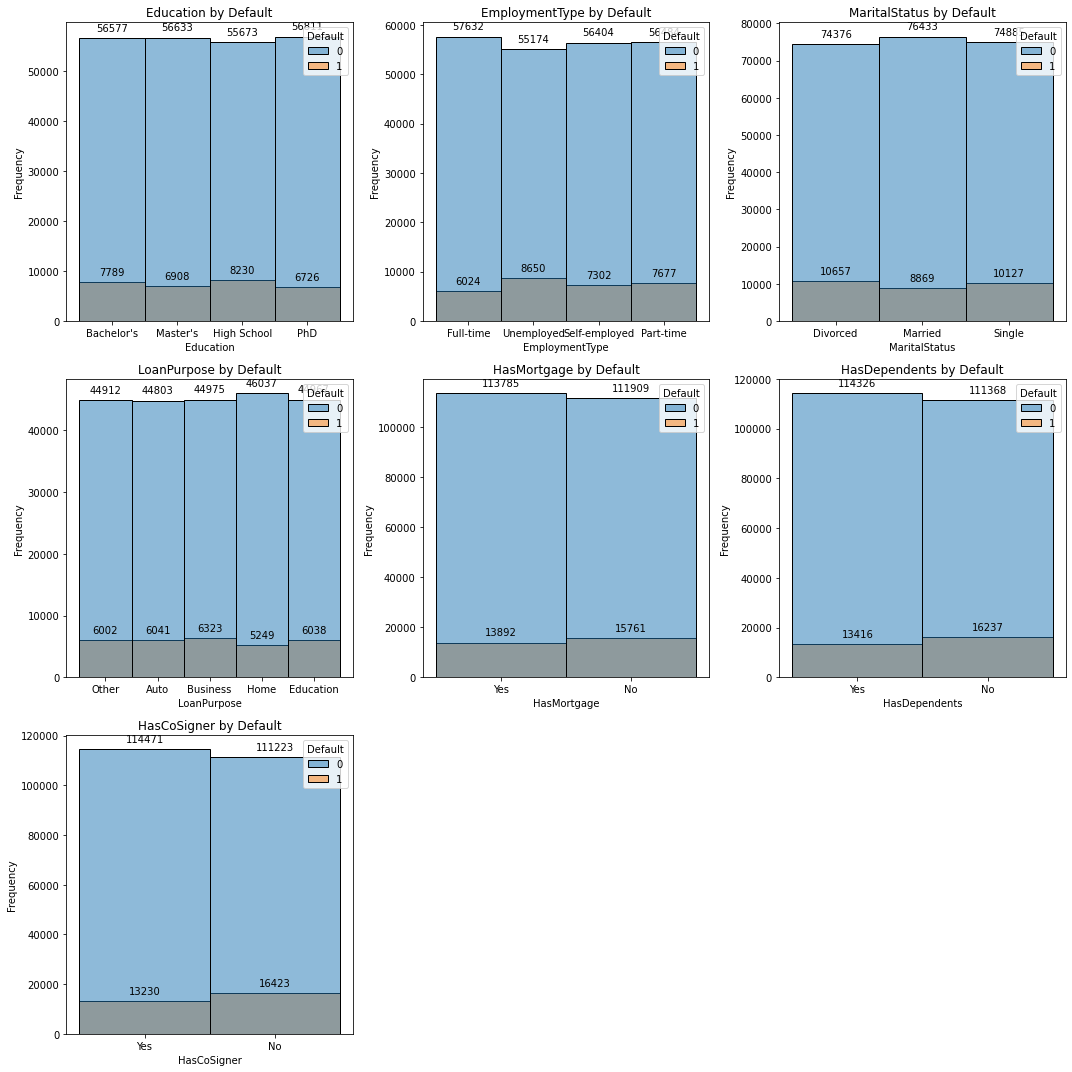

In [15]:
# Define the categorical variables to plot
categorical_variables = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']

# Create a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the 3x3 grid into a 1D array for easier indexing
axs = axs.flatten()

# Loop through the first 7 categorical variables and create a histogram
for i, category in enumerate(categorical_variables[:7]):
    ax = axs[i]
    sns.histplot(data=train_df, x=category, hue='Default', kde=False, color='green', ax=ax)

    # Add labels and title
    ax.set_xlabel(category)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{category} by Default')

    # Add values inside the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove empty subplots (if any)
for i in range(len(categorical_variables), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

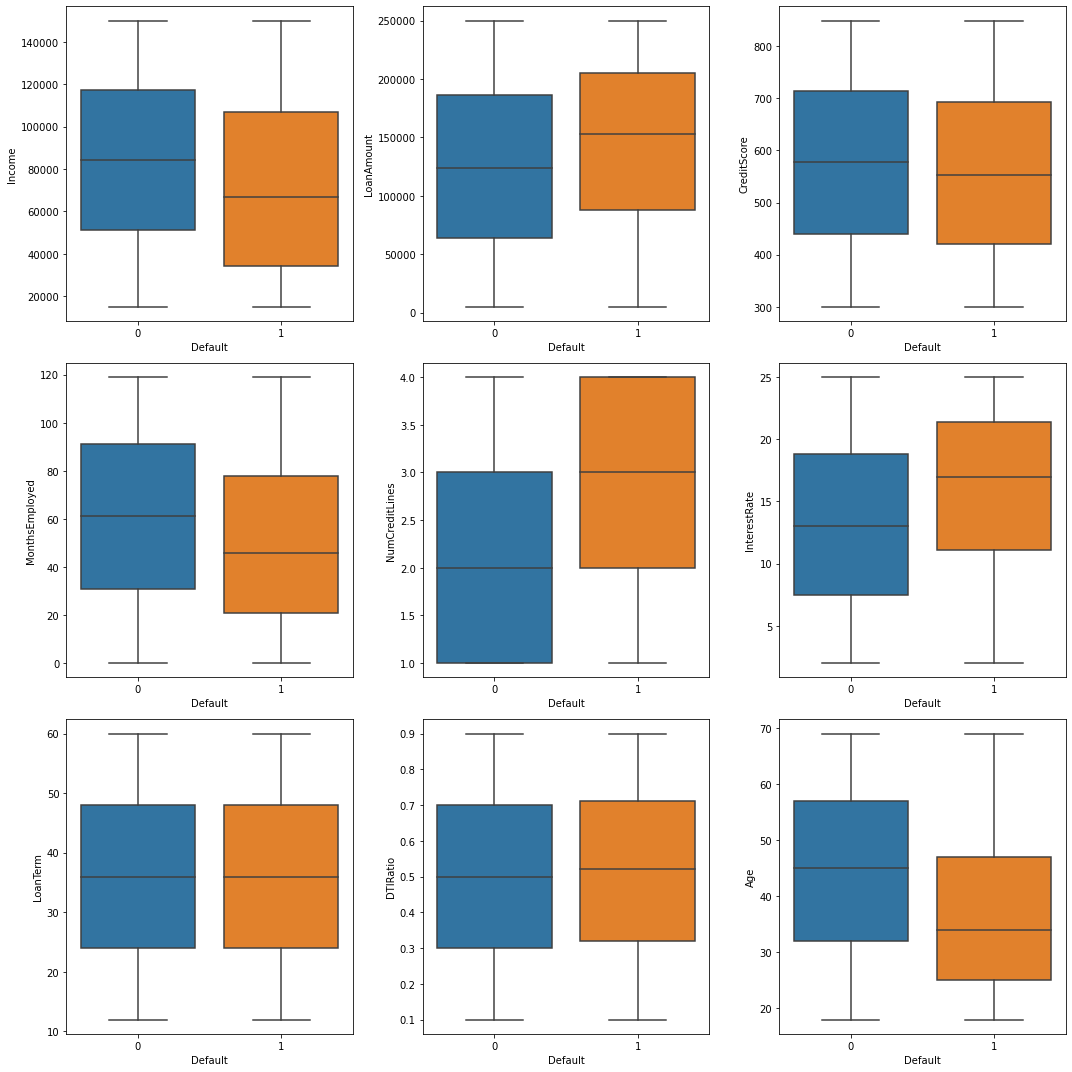

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid

sns.boxplot(x="Default", y="Income", data=train_df, ax=axs[0, 0])
sns.boxplot(x="Default", y="LoanAmount", data=train_df, ax=axs[0, 1])
sns.boxplot(x="Default", y="CreditScore", data=train_df, ax=axs[0, 2])
sns.boxplot(x="Default", y="MonthsEmployed", data=train_df, ax=axs[1, 0])
sns.boxplot(x="Default", y="NumCreditLines", data=train_df, ax=axs[1, 1])
sns.boxplot(x="Default", y="InterestRate", data=train_df, ax=axs[1, 2])
sns.boxplot(x="Default", y="LoanTerm", data=train_df, ax=axs[2, 0])
sns.boxplot(x="Default", y="DTIRatio", data=train_df, ax=axs[2, 1])
sns.boxplot(x="Default", y="Age", data=train_df, ax=axs[2, 2])

# Adjust layout
plt.tight_layout()

# Show the plots

# Data Preprocessing

In [17]:
train_df['Education'] = train_df['Education'].str.replace("Bachelor's", 'Bachelors')
train_df['Education'] = train_df['Education'].str.replace("Master's", 'Masters')

In [18]:
cols1 = ['HasMortgage', 'HasDependents','HasCoSigner']

for col in cols1:
    train_df[col] = train_df[col].map({'No': 0, 'Yes': 1})

In [19]:
train_df = pd.get_dummies(train_df, columns=['Education','EmploymentType', 'MaritalStatus','LoanPurpose'])
train_df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,1,0,0,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,1,0,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,1,1,0,0,1,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0,1,0,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,1,1,0,0,1,0,0,0,0


In [20]:
cols2 = ['Education_Bachelors' ,'Education_High School','Education_Masters', 'Education_PhD',
         'EmploymentType_Full-time','EmploymentType_Part-time' ,'EmploymentType_Self-employed','EmploymentType_Unemployed',
         'MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single',
         'LoanPurpose_Auto','LoanPurpose_Business','LoanPurpose_Education','LoanPurpose_Home','LoanPurpose_Other']

for col in cols2:
    train_df[col] = train_df[col].astype(int)
train_df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,1,0,0,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0,0,1,0,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,1,1,0,0,1,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0,1,0,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,1,1,0,0,1,0,0,0,0


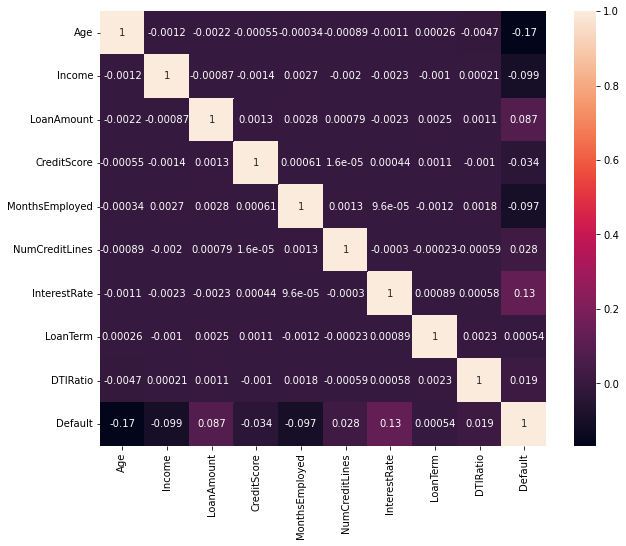

In [21]:
# Correlation Heatmap (Numerical Columns)
plt.figure(figsize=(10,8))
corr = train_df.drop(columns=['LoanID','Education_Bachelors' ,'Education_High School','Education_Masters', 'Education_PhD',
                               'EmploymentType_Full-time','EmploymentType_Part-time' ,'EmploymentType_Self-employed','EmploymentType_Unemployed',
                               'MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','LoanPurpose_Auto',
                               'LoanPurpose_Business','LoanPurpose_Education','LoanPurpose_Home','LoanPurpose_Other',
                               'HasMortgage', 'HasDependents','HasCoSigner']).corr()
sns.heatmap(corr, annot=True)

Default is positively correlated to Interest Rate(0.131275), Loan Amount(0.086659), NumberCreditLines(0.028330). Default is inversely correlated to Age(0.167783), Income(0.099119), MonthsEmployed(0.097374)

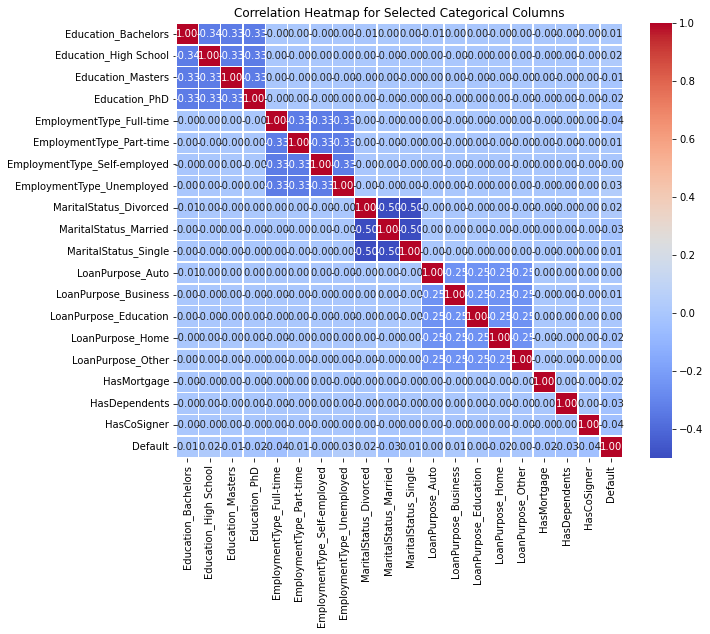

In [22]:
# Select the numerical columns for correlation analysis
Categorical = ['Education_Bachelors', 'Education_High School', 'Education_Masters', 'Education_PhD',
                     'EmploymentType_Full-time', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
                     'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Auto',
                     'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other',
                     'HasMortgage', 'HasDependents', 'HasCoSigner','Default']

# Create a correlation matrix
corr_matrix = train_df[Categorical].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Selected Categorical Columns')
plt.show()

# Feature Selection

Random Forest can be a useful algorithm for feature selection, even when dealing with imbalanced data

In [23]:
from sklearn.model_selection import train_test_split
y = train_df['Default']
X = train_df.copy()
X = X.drop(['LoanID', 'Default'], axis=1)
#split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your feature and target variables
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

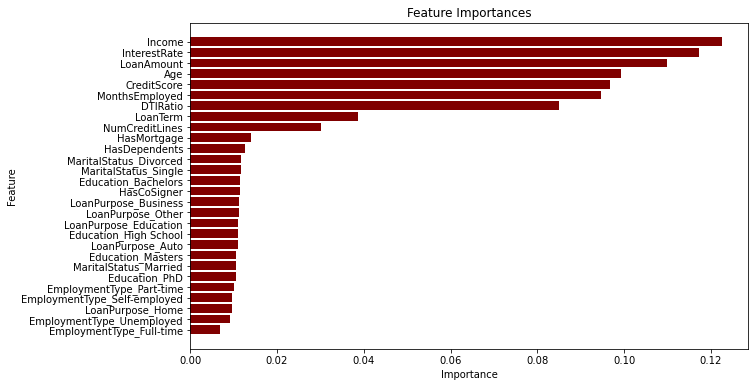

In [25]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [26]:
X = train_df[['InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore','MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']]
y = train_df['Default']

In [27]:
y.value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

# Modelling Methods

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y,random_state=42)

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    average_precision = average_precision_score(y_test, predictions)

    # Store metrics in a DataFrame
    metrics_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'Average Precision': [average_precision]
    })

    return metrics_df


In [30]:
logreg_metrics = evaluate_model(LogisticRegression(max_iter=500,random_state=42), X_train, y_train, X_test, y_test, 'Logistic Regression')
dt_metrics = evaluate_model(DecisionTreeClassifier(random_state=42), X_train, y_train, X_test, y_test, 'Decision Tree')
rf_metrics = evaluate_model(RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test, 'Random Forest')
adaboost_metrics = evaluate_model(AdaBoostClassifier(random_state=42), X_train, y_train, X_test, y_test, 'AdaBoost')
xgb_metrics = evaluate_model(XGBClassifier(random_state=42), X_train, y_train, X_test, y_test, 'XGBoost')


In [31]:
all_metrics_df = pd.concat([logreg_metrics, dt_metrics, rf_metrics, adaboost_metrics, xgb_metrics], ignore_index=True)
all_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,Average Precision
0,Logistic Regression,0.884346,0.608696,0.011331,0.022249,0.121705
1,Decision Tree,0.803453,0.199906,0.230676,0.214192,0.135450
2,Random Forest,0.884941,0.546961,0.053420,0.097333,0.139139
3,AdaBoost,0.885396,0.602972,0.038311,0.072045,0.134776
4,XGBoost,0.885192,0.549645,0.062728,0.112604,0.143318


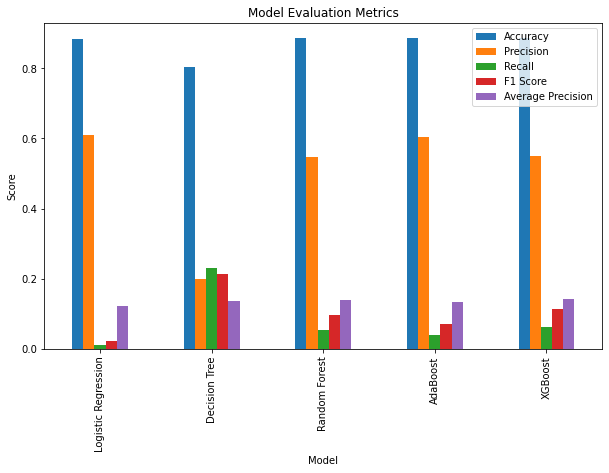

In [32]:
all_metrics_df.set_index('Model', inplace=True)

# Plot the metrics
all_metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='upper right')
plt.show()

# Resampling - Random Under Sampler

In [33]:
# Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [34]:

RUS_logreg_metrics = evaluate_model(LogisticRegression(max_iter=500,random_state=42), X_rus, y_rus, X_test, y_test, 'Logistic Regression RUS')
RUS_dt_metrics = evaluate_model(DecisionTreeClassifier(random_state=42), X_rus, y_rus, X_test, y_test, 'Decision Tree RUS')
RUS_rf_metrics = evaluate_model(RandomForestClassifier(random_state=42), X_rus, y_rus, X_test, y_test, 'Random Forest RUS')
RUS_adaboost_metrics = evaluate_model(AdaBoostClassifier(random_state=42), X_rus, y_rus, X_test, y_test, 'AdaBoost RUS')
RUS_xgb_metrics = evaluate_model(XGBClassifier(random_state=42), X_rus, y_rus, X_test, y_test, 'XGBoost RUS')


In [35]:

RUS_metrics_df = pd.concat([RUS_logreg_metrics, RUS_dt_metrics, RUS_rf_metrics, RUS_adaboost_metrics, RUS_xgb_metrics], ignore_index=True)
RUS_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,Average Precision
0,Logistic Regression RUS,0.673904,0.212583,0.668690,0.322606,0.180625
1,Decision Tree RUS,0.585194,0.156116,0.583839,0.246357,0.139473
2,Random Forest RUS,0.679167,0.214323,0.661271,0.323725,0.181060
3,AdaBoost RUS,0.673309,0.215549,0.687036,0.328147,0.184433
4,XGBoost RUS,0.674828,0.212231,0.663834,0.321634,0.179923


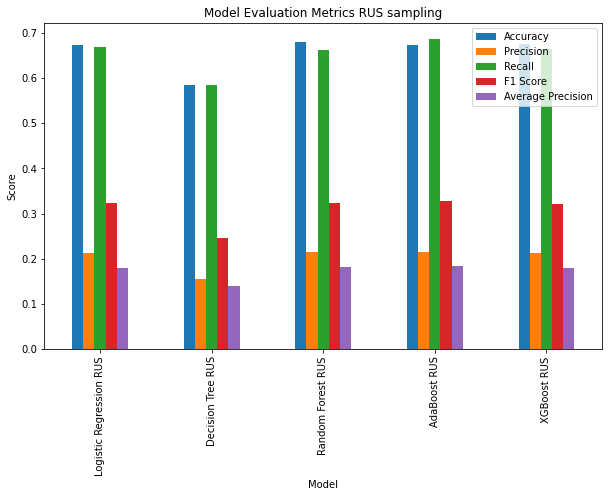

In [36]:
RUS_metrics_df.set_index('Model', inplace=True)

# Plot the metrics
RUS_metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics RUS sampling')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='upper right')
plt.show()

# Ensemble

In [37]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_rus, y_rus, and X_test are defined before this code snippet

base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model, random_state=42)

# Assuming you've already defined X_rus, y_rus for RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_rus, y_rus)

bagging_model.fit(X_rus, y_rus)
y_pred_bagging = bagging_model.predict(X_test)

metrics_bagging = {
    "Accuracy": accuracy_score(y_test, y_pred_bagging),
    "Precision": precision_score(y_test, y_pred_bagging),
    "Recall": recall_score(y_test, y_pred_bagging),
    "F1 Score": f1_score(y_test, y_pred_bagging)
}
df_metrics_bagging_DT = pd.DataFrame.from_dict(metrics_bagging, orient='index', columns=['Bagging_DT'])
print(df_metrics_bagging_DT)

conf_matrix = confusion_matrix(y_test, y_pred_bagging)
print("Confusion Matrix:\n", conf_matrix)


           Bagging_DT
Accuracy     0.689459
Precision    0.200868
Recall       0.562121
F1 Score     0.295973
Confusion Matrix:
 [[39846 16578]
 [ 3246  4167]]


# RUSBoost 

In [38]:
from sklearn.metrics import average_precision_score, fbeta_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier

base_model = DecisionTreeClassifier(random_state=42)
rusboost_classifier = RUSBoostClassifier(base_model, n_estimators=50, algorithm='SAMME.R', random_state=42)
rusboost_classifier.fit(X_train, y_train)
predictions_dt = rusboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt)
recall = recall_score(y_test, predictions_dt)
f1 = f1_score(y_test, predictions_dt)

conf_matrix = confusion_matrix(y_test, predictions_dt)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, predictions_dt)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
 [[54955  1469]
 [ 6952   461]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     56424
           1       0.24      0.06      0.10      7413

    accuracy                           0.87     63837
   macro avg       0.56      0.52      0.51     63837
weighted avg       0.81      0.87      0.83     63837



# Bagging-ADABoost

In [41]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_rus, y_rus, and X_test are defined before this code snippet

base_model = AdaBoostClassifier(random_state=42)
bagging_model = BaggingClassifier(base_model, random_state=42)

# Assuming you've already defined X_rus, y_rus for RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_rus, y_rus)

bagging_model.fit(X_rus, y_rus)
y_pred_bagging = bagging_model.predict(X_test)

metrics_bagging = {
    "Accuracy": accuracy_score(y_test, y_pred_bagging),
    "Precision": precision_score(y_test, y_pred_bagging),
    "Recall": recall_score(y_test, y_pred_bagging),
    "F1 Score": f1_score(y_test, y_pred_bagging)
}
df_metrics_bagging_DT = pd.DataFrame.from_dict(metrics_bagging, orient='index', columns=['Bagging_DT'])
print(df_metrics_bagging_DT)

conf_matrix = confusion_matrix(y_test, y_pred_bagging)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred_bagging)
print("Classification Report:")
print(classification_rep)

           Bagging_DT
Accuracy     0.675909
Precision    0.217484
Recall       0.689330
F1 Score     0.330648
Confusion Matrix:
 [[38038 18386]
 [ 2303  5110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.79     56424
           1       0.22      0.69      0.33      7413

    accuracy                           0.68     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.68      0.73     63837



For an imbalanced dataset, maintaining high recall to reduce false negatives involves compromising precision and finding a balance between precision and recall trade-offs. When predicting the test datas, the bagging classifier for AdaBoost with resampled (RUS) yields a recall of approximately 0.69 and an accuracy of around 0.68.

In [44]:
X_test = test_df[['LoanID','InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore','MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']]
predicted_probability = bagging_model.predict_proba(X_test.drop(['LoanID'], axis=1))[:,1]

In [45]:
prediction_df = pd.DataFrame({'LoanID': X_test[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [46]:
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.495300
1,JDL5RH07AM,0.490105
2,STAL716Y79,0.495686
3,SO0KKJ3IQB,0.499364
4,T99CWTYDCP,0.500914
5,0SNHFWV4UP,0.498485
6,S6ITP6LGYS,0.492845
7,A6I7U12IRJ,0.495964
8,8W6KY50JU4,0.499567
9,THFQ08OLMU,0.499236
